# 설치

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np


# 1주차 이미지 불러오기

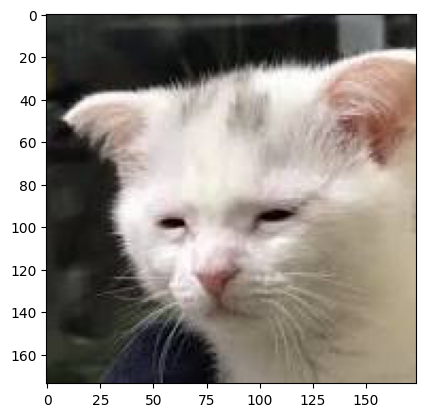

In [4]:
img = cv2.imread('../week/cat.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

이미지 흑백 불러오기

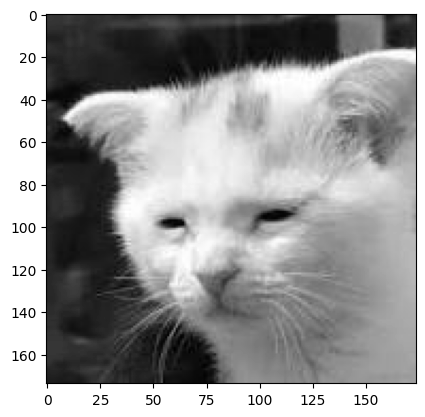

In [10]:
gray_img = cv2.imread('cat.jpg', cv2.IMREAD_GRAYSCALE)
plt.imshow(gray_img, cmap='gray')
plt.show()

# 2주차

이미지에 선, 사각형, 원, 삼각형 그리기

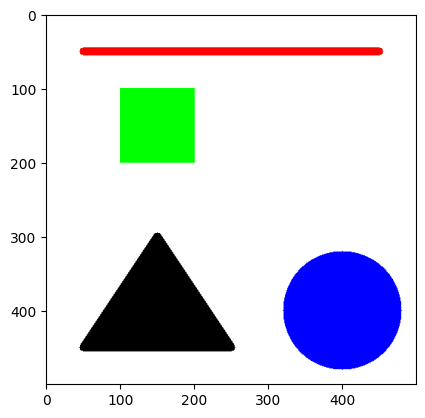

In [23]:
img = np.full((500,500,3),255,dtype=np.uint8)

cv2.line(img,(50,50),(450,50),(255,0,0),thickness=10)
cv2.rectangle(img, (100,100),(200,200),(0,255,0),thickness=-1)
cv2.circle(img, (400,400),80,(0,0,255),thickness=-1)
pts = np.array([[[150, 300], [50, 450], [250, 450]]])
cv2.polylines(img, pts, True, (0,0,0),thickness=10)
cv2.fillPoly(img, pts, (0,0,0))
plt.imshow(img)
plt.show()

스레시홀딩: 이미지를 검은색과 흰색으로만 표현하는 것으로 이진화(binary) 이미지라고 한다.
* ret, out = cv2.threshold(img, 경계값,경계 값 기준에 만족하는 픽셀에 적용할 값, 스레시홀드 적용방법)
* cv2.threshold(img, 127, 255,타입) 타입만 맞게 수정하고 보통 이 형식으로 쓰는 듯

  ret: threshold로 전달한 값과 같아서 쓸모없음(생략)  
  out: 결과 이미지 

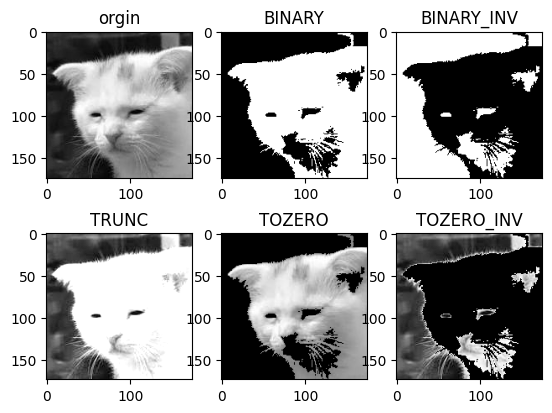

In [11]:
img = cv2.imread('cat.jpg', cv2.IMREAD_GRAYSCALE)

_, t_bin = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)
_, t_bininv = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY_INV)
_, t_truc = cv2.threshold(img, 127, 255, cv2.THRESH_TRUNC)
_, t_2zr = cv2.threshold(img, 127, 255, cv2.THRESH_TOZERO)
_, t_2zrinv = cv2.threshold(img, 127, 255, cv2.THRESH_TOZERO_INV)

imgs = {'orgin':img, 'BINARY':t_bin, 'BINARY_INV':t_bininv, 
        'TRUNC':t_truc,'TOZERO':t_2zr,'TOZERO_INV':t_2zrinv}

for i,(k,v) in enumerate(imgs.items()):
    plt.subplot(2,3,i+1)
    plt.title(k)
    plt.imshow(v, cmap='gray')
plt.show()

오츠  
* 오츠의 알고리즘은 경계값을 임의로 정해 픽셀들을 두 부류로 나누고 두 부류의 명암 분포를 반복해서 구한 다음 명암 분포를 가장 균일하게 하는 경계 값을 선택한다.


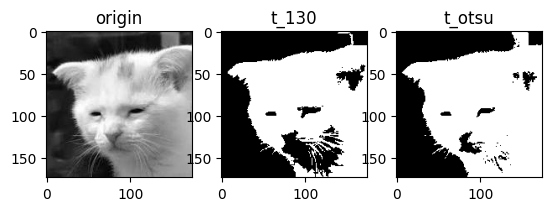

In [15]:
img = cv2.imread('cat.jpg', cv2.IMREAD_GRAYSCALE)

# 경계 값 130으로 지정
_, t_130 = cv2.threshold(img, 130, 256, cv2.THRESH_BINARY)

# 오츠 알고리즘으로 선택
_, t_otsu = cv2.threshold(img, -1, 256, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

imgs={'origin':img, 't_130':t_130, 't_otsu':t_otsu}

for i, (k,v) in enumerate(imgs.items()):
    plt.subplot(1,3,i+1)
    plt.title(k)
    plt.imshow(v, cmap='gray')
plt.show()

히스토그램: 뭐가 몇개 있는지 개수를 세어 놓은 것을 그림으로 표시한 것, 영상 분석에 도움

cv2.calcHist([입력영상], [처리할 채널], 마스크(주로 None), [계급 수], [값의 범위])  

보통 cv2.calcHist([img],[0],None,[256],[0,256]) 이 형식 사용  

* 채널의 경우 1채널은 [0], 2채널 [0,1], 3채널[0,1,2]
* 계급 수는 1채널 [256], 2채널[256,256] 3채널 [256,256,256]

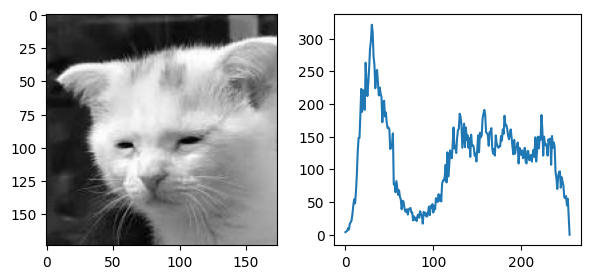

In [20]:
img = cv2.imread('cat.jpg', cv2.IMREAD_GRAYSCALE)

hist = cv2.calcHist([img],[0],None,[256],[0,256]) # 범위값까지만 작성
fig, axes = plt.subplots(ncols=2, figsize=(7,3))
axes[0].imshow(img,cmap='gray')
axes[1].plot(hist) # imshow 말고 plot으로 읽기!
plt.show()

정규화: 기준이 서로 다른 값을 같은 기준이 되게 만드는 것  
dst = cv2.normalize(img, None, 0, 255, cv2.NORM_MINMAX)
* dst: 노멀라이즈 이후 데이터
* src: 이전 데이터
* alpha: 노멀라이즈 구간1
* beta: 구간2
* type_flag: 알고리즘 선택 플래그 상수

In [ ]:
img = cv2.imread('cat.jpg', cv2.IMREAD_GRAYSCALE)
img_norm = cv2.normalize(img, None, 0, 255, cv2.NORM_MINMAX)

fig, axes = plt.subplots(ncols=2, dpi=300, figsize=(7,3))
axes[0].imshow(img, cmap='gray')
axes[1].imshow(img_norm, cmap='gray')
plt.show()

# 3주차

산술 연산  
: 영상은 2차원 행렬이기 때문에 행렬의 산술 연산을 그대로 적용할 수 있다. 두 개의 이미지나 영상을 서로 더하거나 빼는 연산을 수행하여 새로운 결과 영상을 생성한다.

In [13]:
import cv2
import numpy as np

a = np.uint8([[200, 50]]) 
b = np.uint8([[100, 100]])

add1 = a + b
sub1 = a - b
mult1 = a * 2
div1 = a / 3

add2 = cv2.add(a, b)
sub2 = cv2.subtract(a, b)
mult2 = cv2.multiply(a , 2)
div2 = cv2.divide(a, 3)

print(add1, add2)
print(sub1, sub2)
print(mult1, mult2)
print(div1, div2)

[[ 44 150]] [[255 150]]
[[100 206]] [[100   0]]
[[144 100]] [[255 100]]
[[66.66666667 16.66666667]] [[67 17]]


In [14]:
a = np.array([[1, 2]], dtype=np.uint8)
b = np.array([[10, 20]], dtype=np.uint8)

mask = np.array([[1, 0]], dtype=np.uint8)

c1 = cv2.add( a, b , None, mask)
print(c1)
c2 = cv2.add( a, b , b.copy(), mask)
print(c2, b)

[[11  0]]
[[11 20]] [[10 20]]


이미지 합성

In [16]:
# 이미지 크기 알기
import cv2

img = cv2.imread('cat-01.jpg')
print(img.shape)

(443, 444, 3)


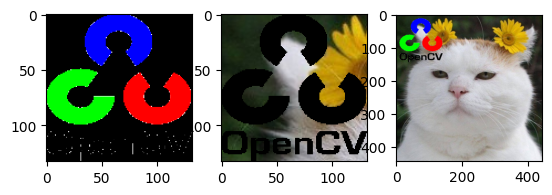

In [17]:
img_fg = cv2.imread("logo.png", cv2.IMREAD_UNCHANGED)  # 4채널 RGBA opencv BGRA
img_fg = cv2.resize(img_fg, (int(443*0.3), int(444*0.3)))
img_bg = cv2.imread("cat-01.jpg")  # 3채널 RGB -> BGR
img_bg = cv2.cvtColor(img_bg, cv2.COLOR_BGR2RGB)

# 알파 채널을 이용해 마스크, 역마스크 생성
_, mask = cv2.threshold(img_fg[:, :, 3], 1, 255, cv2.THRESH_BINARY)
mask_inv = cv2.bitwise_not(mask)

# 전경 영상 크기로 배경 영상에서 ROI 잘라내기
img_fg = cv2.cvtColor(img_fg, cv2.COLOR_BGRA2BGR)
h, w, _ = img_fg.shape 
roi = img_bg[10:10+h, 10:10+w]

# 마스크 이용해서 오려내기
masked_fg = cv2.bitwise_and(img_fg,img_fg, mask=mask)
masked_bg = cv2.bitwise_and(roi, roi, mask=mask_inv)

# 이미지 합성
added = masked_fg + masked_bg
img_bg[10:10+h, 10:10+w] = added

fig, axes = plt.subplots(ncols=3)
axes[0].imshow(masked_fg)
axes[1].imshow(masked_bg)
axes[2].imshow(img_bg)

알파블렌딩  


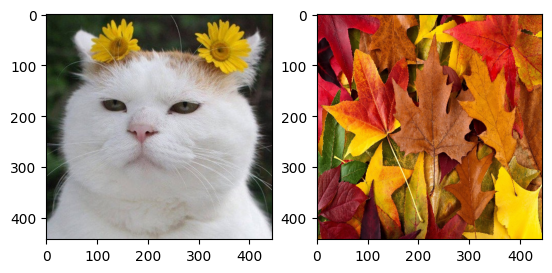

In [26]:
img1 = cv2.imread('cat-01.jpg')
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
# img에 [:2]를 해주는 이유는 컬러 이미지 shape 에는 가로 세로 말고도 차원 수가 적혀있기 때문
h, w = img1.shape[:2] #높이, 너비, 채널 수

img2 = cv2.imread('leaves.jpg')
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
img2 = cv2.resize(img2, (w,h))

fig, axes = plt.subplots(ncols=2)
axes[0].imshow(img1)
axes[1].imshow(img2)
plt.show()

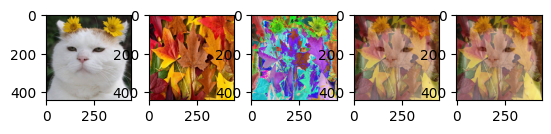

In [29]:
added_img = img1 + img2 # 이미지 덧셈

alpha = 0.5 # 합성에 사용할 알파 값

# 수식을 직접 연산해 알파 블렌딩 적용
blended_img = img1 * alpha + img2 * (1-alpha)
blended_img = blended_img.astype(np.uint8)

# addWeighted() 함수로 알파 블렌딩 적용
dst = cv2.addWeighted(img1, alpha, img2, 1-alpha, 0)

# plt.subplot(nrows,ncols,index)
# nrows는 행의 수, ncols는 열의 수, index는 위치
plt.subplot(1, 5, 1)
plt.imshow(img1)
plt.subplot(1, 5, 2)
plt.imshow(img2)
plt.subplot(1, 5, 3)
plt.imshow(added_img)
plt.subplot(1, 5, 4)
plt.imshow(blended_img)
plt.subplot(1, 5, 5)
plt.imshow(dst)
plt.show()

In [ ]:
# 라운드

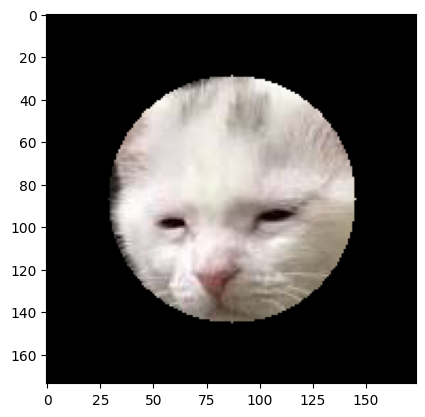

In [22]:
img = cv2.imread('cat.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
h,w = img.shape[:2]

# 마스크 만들기
mask = np.zeros_like(img) 
cv2.circle(mask, (h//2, h//2), h//3, (255,255,255),-1)

masked=cv2.bitwise_and(img, mask) # 마스킹
plt.imshow(masked)
plt.show()

# 4주차 기하학적 변환

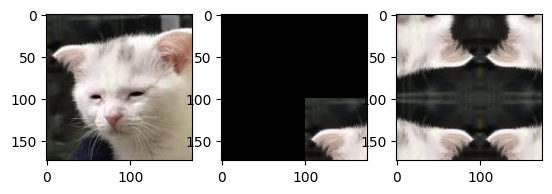

In [36]:
# 평행 이동

img = cv2.imread('cat.jpg')
img = img[..., ::-1] # cv2.cvtColor(img, cv2.COLOR_BGR2RGB와 같음
rows, cols = img.shape[:2] # 영상 크기

dx, dy = 100, 100 # 이동할 픽셀 거리

# 변환행렬 생성
matrix = np.float32([
    [1, 0, dx],
    [0, 1, dy]
])

# 단순 이동
dst = cv2.warpAffine(img, matrix, (cols, rows))

# 탈락된 외곽 픽셀 원본 반전시켜서 보정
dst2 = cv2.warpAffine(
    img, matrix, (cols, rows), None,
    cv2.INTER_LINEAR,
    cv2.BORDER_REFLECT
)

fig, axes = plt.subplots(ncols=3)
axes[0].imshow(img)
axes[1].imshow(dst)
axes[2].imshow(dst2)
plt.show()

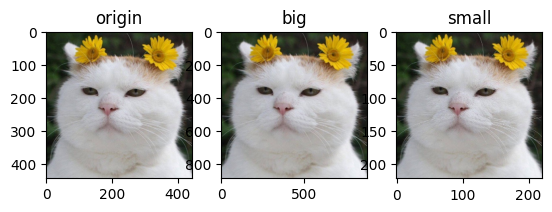

In [38]:
# 확대/축소

img = cv2.imread('cat-01.jpg')
img = img[..., ::-1]
h, w = img.shape[:2]

big = cv2.resize(img, (h*2, w*2))
small = cv2.resize(img, (h//2, w//2))

# fig, axes = plt.subplots(ncols=3)
# axes[0].imshow(img)
# axes[1].imshow(big)
# axes[2].imshow(small)
# plt.show()

imgs={'origin':img, 'big':big, 'small':small}

for i, (k,v) in enumerate(imgs.items()):
    plt.subplot(1,3,i+1)
    plt.title(k)
    plt.imshow(v)
plt.show()

cv2.warpAffine() 함수는 원본 영상을 변환행렬에 따라 변환해서 결과이미지 크기로 만들어 반환함. 
* cv2.warpAffine(원본이미지, 변환행렬, 결과이미지)

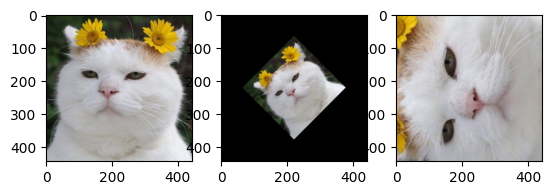

In [70]:
# 회전
img = cv2.imread('cat-01.jpg')
img = img[...,::-1]
h,w = img.shape[:2]

# 회전을 위한 변환행렬 구하기
# 회전축: 중앙, 각도: 45, 배율: 0.5
m45 = cv2.getRotationMatrix2D((h/2, w/2),45, 0.5)

# 회전축: 중앙, 각도: 90, 배율: 1.5
m90 = cv2.getRotationMatrix2D((h/2, w/2),90, 1.5)

img45 = cv2.warpAffine(img, m45, (h,w))
img90 = cv2.warpAffine(img, m90, (h,w))

fig, axes = plt.subplots(ncols=3)
axes[0].imshow(img)
axes[1].imshow(img45)
axes[2].imshow(img90)
plt.show()

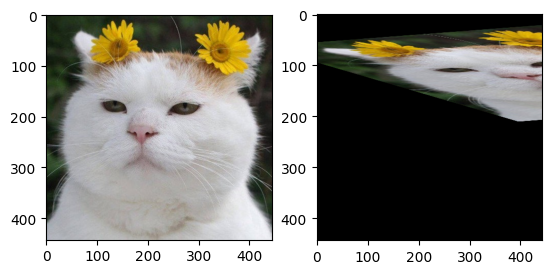

In [71]:
# 뒤틀기

img = cv2.imread('cat-01.jpg')
img = img[...,::-1]
h,w = img.shape[:2]

# 어핀변환
 
pts1 = np.float32([[100,50], [200,50], [100,200]]) # 변환 전
pts2 = np.float32([[80, 70], [210, 60], [250, 120]]) # 변환 후

matrix = cv2.getAffineTransform(pts1, pts2) # 좌표로 변환행렬 계산
dst = cv2.warpAffine(img, matrix, (h, w)) # 어핀 변환 적용

fig, axes = plt.subplots(ncols=2)
axes[0].imshow(img)
axes[1].imshow(dst)
plt.show()

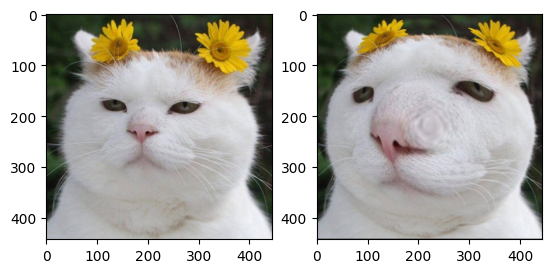

In [73]:
# 렌즈왜곡

# 설정 값 세팅
exp = 2 # 볼록지수 1.1~, 오목지수 0.1~1.0
scale = 1 # 변환영역 크기(0~1), 1은 100%를 의미

# 매핑 배열 생성
mapy, mapx = np.indices((h,w), dtype=np.float32)
# 좌상단 좌표에서 중심점 기준 좌표로 변경
mapx = 2 * mapx / (w-1)-1
mapy = 2 * mapy / (h-1)-1

r, theta = cv2.cartToPolar(mapx, mapy) # 직교좌표를 극좌표로
r[r < scale] = r[r < scale] ** exp # 왜곡 영역만 중심 확대/축소 치수 적용

mapx, mapy = cv2.polarToCart(r, theta) # 극좌표를 직교좌표로

# 중심점 기준에서 좌상단 기준 좌표로 변경
mapx = ((mapx + 1) * w-1) / 2
mapy = ((mapy + 1) * h-1) / 2

distorted = cv2.remap(img, mapx, mapy, cv2.INTER_LINEAR) # 리매핑 변환
fig, axes = plt.subplots(ncols=2)
axes[0].imshow(img)
axes[1].imshow(distorted)
plt.show()

# 5주차 영상필터
    * 컨볼루션 연산(합성곱): 커널의 각 요소와 대응하는 입력 픽셀 값을 곱해서 모두 합한 것을 결과 픽셀 값으로 결정하고, 이를 마지막 픽셀까지 반복하는 것  

    * dst = cv2.filter2D(입력 영상, 출력영상 dtype, 커널,) 

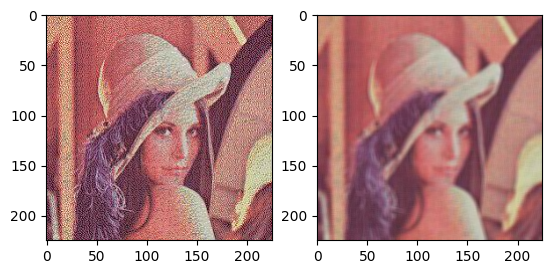

In [75]:
img = cv2.imread('noise.jpg')
img = img[...,::-1]

kernel = np.full((5,5),0.04) # 5x5 평균 필터 커널 생성
blur = cv2.filter2D(img, -1, kernel) # -1이면 입력영상과 동일

fig, axes = plt.subplots(ncols=2)
axes[0].imshow(img)
axes[1].imshow(blur)
plt.show()

가우시안 블러링: 중앙 값이 가장 크고 멀어질수록 그 값이 작아지는 커널을 사용하는 블러링  
* cv2.GaussianBlur(입력영상, 커널 크기, X방향 표준편차)
    * X방향 표준편차 값이 0이면 자동으로 표준편차 선택사용 
    
미디언 블러링: 커널 영역 픽셀 값 중 중간 값을 대상 픽셀의 값으로 선택하는 것, 소금과 후추같은 잡음 제거에 효과적
* cv2.medianBlur(입력영상, 커널크기)

바이레터럴 필터: 경계 또렷한 블러링
* cv2.bilateralFilter(입력영상, 필터직경 5보다 크면 느려짐, 색공간 시그마 값, 보통 앞 시그마랑 값 똑같이)

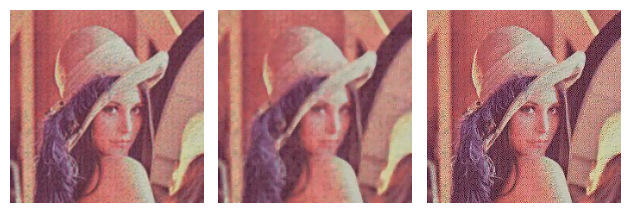

In [80]:
# 가우시안 블러링
gaussian_blur = cv2.GaussianBlur(img, (3,3),0)

# 미디언 블러링
median_blur = cv2.medianBlur(img, 5)

# 바이레터럴 필터
bilateral_blur = cv2.bilateralFilter(img, 5, 75, 75)

fig, axes = plt.subplots(ncols=3)
axes[0].imshow(gaussian_blur)
axes[1].imshow(median_blur )
axes[2].imshow(bilateral_blur)
axes[0].axis("off")
axes[1].axis("off")
axes[2].axis("off")
fig.tight_layout()
plt.show()

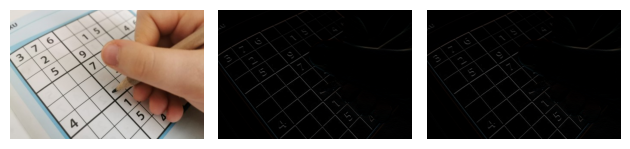

In [83]:
# 경계검출

# 미분 커널로 경계검출
img = cv2.imread('sudoku.jpg')
img = img[...,::-1]

# 미분 커널 생성
gx_kernel = np.array([-1,1])
gy_kernel = np.array([[-1],[1]])

# 필터 적용
edge_gx = cv2.filter2D(img, -1, gx_kernel)
edge_gy = cv2.filter2D(img, -1, gy_kernel)

fig, axes = plt.subplots(ncols=3)
axes[0].imshow(img)
axes[1].imshow(edge_gx)
axes[2].imshow(edge_gy)
axes[0].axis("off")
axes[1].axis("off")
axes[2].axis("off")
fig.tight_layout()
plt.show()

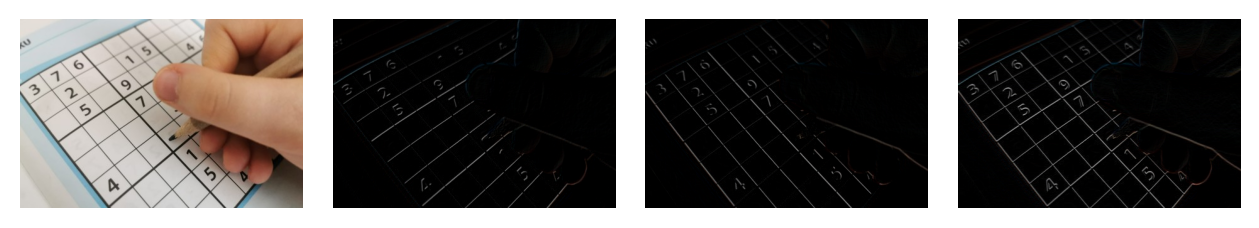

In [89]:
# 로버츠 교차 필터, 실무에서는 사용 안함

gx_kernel = np.array([[1, 0], [0, -1]])
gy_kernel = np.array([[0, 1], [-1, 0]])

edge_gx = cv2.filter2D(img, -1, gx_kernel)
edge_gy = cv2.filter2D(img, -1, gy_kernel)

fig, (ax1, ax2, ax3, ax4) = plt.subplots(ncols=4, dpi=200)
ax1.imshow(img)
ax2.imshow(edge_gx)
ax3.imshow(edge_gy)
ax4.imshow(edge_gx + edge_gy)
ax1.axis("off")
ax2.axis("off")
ax3.axis("off")
ax4.axis("off")
fig.tight_layout()
plt.show()

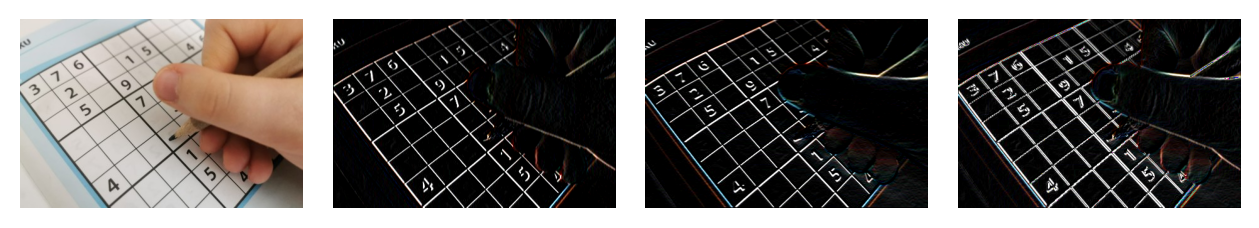

In [39]:
# 소벨 필터, 가장 대표적인 1차 미분 마스크
# dst = cv2.Sobel(입력영상, 츨력영상 dtype, 
#      미분 차수 0,1,2중 선택, 커널 크기 1,3,5,7 중 선택)
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('sudoku.jpg')
img = img[...,::-1]

# 소벨 커널 직접 생성해 경계 검출
gx_kernel = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
gy_kernel = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])
edge_gx = cv2.filter2D(img, -1, gx_kernel)
edge_gy = cv2.filter2D(img, -1, gy_kernel)

# 소벨 API로 경계 검출
sobelx = cv2.Sobel(img, -1, 1, 0, ksize=3) # 출력영상 -1이면 입력이랑 동일
sobely = cv2.Sobel(img, -1, 1, 0, ksize=3)

fig, (ax1, ax2, ax3, ax4) = plt.subplots(ncols=4, dpi=200)
ax1.imshow(img)
ax2.imshow(edge_gx)
ax3.imshow(edge_gy)
ax4.imshow(edge_gx + edge_gy)
ax1.axis("off")
ax2.axis("off")
ax3.axis("off")
ax4.axis("off")
fig.tight_layout()
plt.show()

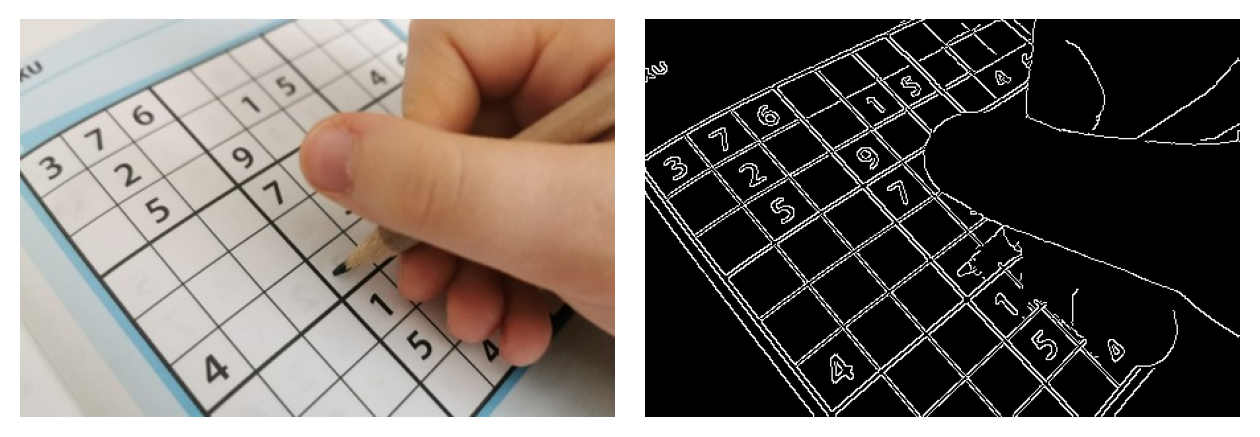

In [6]:
# 캐니 엣지, 검출 결과가 가장 뛰어남, 가장 많이 사용

#cv2.Canny(img, 스레시홀딩 최소, 최대값)
edge = cv2.Canny(img, 50, 200)

fig, (ax1, ax2) = plt.subplots(ncols=2, dpi=200)
ax1.imshow(img)
ax2.imshow(edge, cmap='gray')
ax1.axis("off")
ax2.axis("off")
fig.tight_layout()
plt.show()

# 6주차 영상분할

이미지 컨투어: 동일한 색 또는 픽셀값의 강도를 찾아 경계선의 정보를 얻고 물체에 대한 윤곽선과 외형을 파악하는 것

7


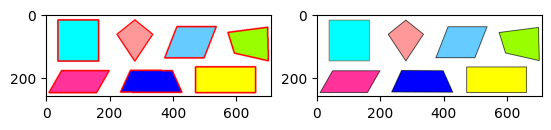

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img1 = cv2.imread('shapes.png')
img2 = img1.copy()

img_gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
_, img_thresh = cv2.threshold(img_gray, 127, 255, cv2.THRESH_BINARY_INV)
contour, hierarchy = cv2.findContours(
    img_thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE
)
print(len(contour))

cv2.drawContours(img1, contour, -1, (255, 0, 0), 4)

fig, (ax1, ax2) = plt.subplots(ncols=2)
ax1.imshow(img1)
ax2.imshow(img2)
plt.show()

7


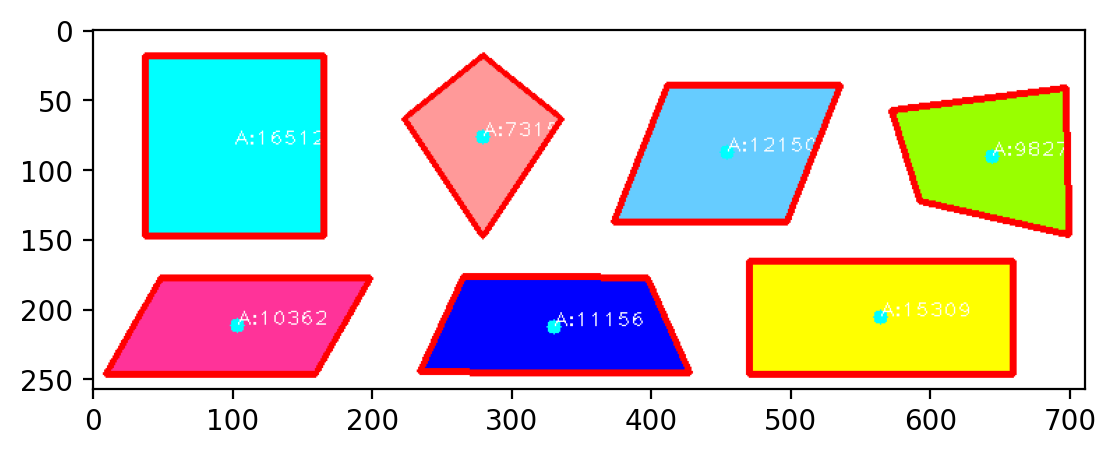

In [9]:
# 이미지 모멘트를 이용한 중심점
import cv2
import numpy as np
import matplotlib.pyplot as plt

img1 = cv2.imread("shapes.png")
# img1 = cv2.imread("cat-01.jpg")
img2 = img1.copy()

img_gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
_, img_thresh = cv2.threshold(
    img_gray, 127, 255, cv2.THRESH_BINARY_INV
)
contours, hierarchy = cv2.findContours(
    img_thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE
)
print(len(contours))

for c in contours:
    mmt = cv2.moments(c)
    cx = int(mmt["m10"] / mmt["m00"])
    cy = int(mmt["m01"] / mmt["m00"])
    # 영역 넓이
    area = mmt["m00"]
    # 영역 외곽선의 길이
    length = cv2.arcLength(c, True)
    
    cv2.circle(img1, (cx, cy), 5, (0, 255, 255), -1)
    cv2.putText(
        img1, "A:%.0f"%area, (cx, cy), cv2.FONT_HERSHEY_PLAIN,
        1, (255, 255, 255)
    )
    
cv2.drawContours(img1, contour, -1, (255, 0, 0), 4)

fig, ax1 = plt.subplots(dpi=200)
ax1.imshow(img1)
plt.show()

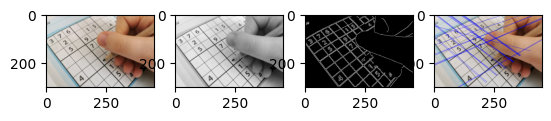

In [12]:
# 허프 변환
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread("sudoku.jpg")
img2 = img.copy()
h, w = img.shape[:2]
# 그레이 스케일 변환, 엣지 검출
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(img_gray, 50, 200)

# 허프 선 검출
lines = cv2.HoughLines(edges, 1, np.pi/180, 130)
for line in lines: # 검출된 모든 선 순회
    r, theta = line[0] # 거리, 각도
    tx, ty = np.cos(theta), np.sin(theta) # x,y축에 대한 삼각비
    x0, y0 = tx*r, ty*r # x,y기준 좌표
    # 직선방정식으로 그리기 위한 시작점, 끝점 계산
    x1, y1 = int(x0 + w*(-ty)), int(y0 + h * tx)
    x2, y2 = int(x0 - w*(-ty)), int(y0 - h * tx)
    # 선그리기
    cv2.line(img2, (x1, y1), (x2, y2), (255, 0, 0), 1)

fig, axes = plt.subplots(ncols=4)
axes.flat[0].imshow(img[...,::-1])
axes.flat[1].imshow(img_gray, cmap='gray')
axes.flat[2].imshow(edges ,cmap='gray')
axes.flat[3].imshow(img2[...,::-1])
plt.show()